In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [40]:
abt = pd.read_csv(r"C:\Users\Vichy\Desktop\Cognitivo\ABT_Price.csv", sep=";" , converters={11:float} )
abt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26589 entries, 0 to 26588
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   26589 non-null  int64  
 1   name                                 26560 non-null  object 
 2   host_id                              26589 non-null  int64  
 3   host_name                            26565 non-null  object 
 4   neighbourhood_group                  0 non-null      float64
 5   neighbourhood                        26589 non-null  object 
 6   latitude                             26589 non-null  float64
 7   longitude                            26589 non-null  float64
 8   room_type                            26589 non-null  object 
 9   price                                26589 non-null  int64  
 10  minimum_nights                       26589 non-null  int64  
 11  number_of_reviews           

Entire home/apt
Training Set Score: 0.75
Test Set Score: -0.03


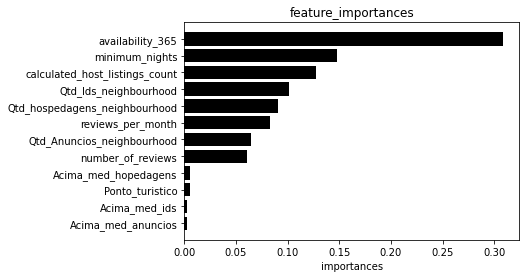

Hotel room
Training Set Score: 0.77
Test Set Score: -24.91


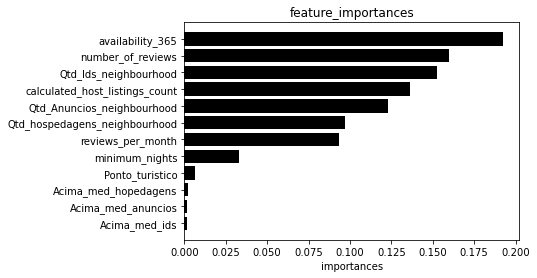

Private room
Training Set Score: 0.58
Test Set Score: -0.02


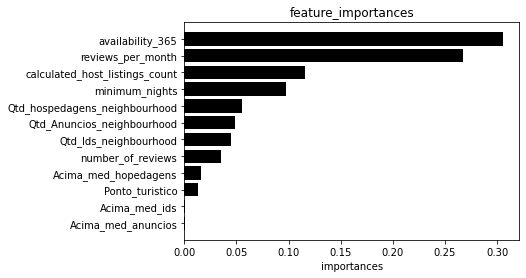

Shared room
Training Set Score: 0.61
Test Set Score: -29.86


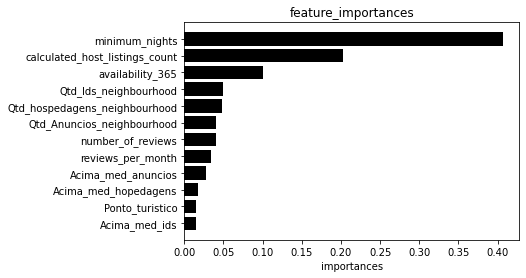

In [65]:
abt_treat = abt[abt["price"] < 60000]

for k,group in abt_treat.groupby(["room_type"]):    

    y = group["price"].values
    X = group.iloc[:,[10,11,13,14,15,16,17,18,22,23,24,26]]
    features = X.columns.values
    X_train, X_test, y_train, y_test = train_test_split(X.values, y, random_state=42)
    m = RandomForestRegressor().fit(X_train, y_train)
    print(k)
    print('Training Set Score: {:.2f}'.format(m.score(X_train, y_train)))
    print('Test Set Score: {:.2f}'.format(m.score(X_test, y_test)))
    importances = m.feature_importances_
    indices = np.argsort(importances)
    plt.title("feature_importances")
    plt.barh(range(len(indices)), importances[indices], color="k", align = "center")
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel("importances")
    plt.show()
    

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
rf = RandomForestRegressor(n_estimators=500).fit(X_train, y_train)

# print('Coef: ', lr.coef_)
# print('Intercept: ', lr.intercept_)
print('Training Set Score: {:.2f}'.format(rf.score(X_train, y_train)))
print('Test Set Score: {:.2f}'.format(rf.score(X_test, y_test)))

Training Set Score: 0.61
Test Set Score: -0.02
